In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet,stopwords
from nltk import word_tokenize,sent_tokenize
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,confusion_matrix,classification_report

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

import re
import pickle


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
data = pd.read_csv("/content/drive/My Drive/ColabDataset/HamOrSpam/SpamOrHam.csv",encoding = "ISO-8859-1")

In [ ]:
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
data.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
spam= data[['v1','v2']]
spam.rename(columns ={'v1':'Label','v2':'Text'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
spam.head(10)

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
spam['Label'] = spam['Label'].map({'ham':0,'spam':1})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
spam

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
spam['Label'].value_counts()

0    4825
1     747
Name: Label, dtype: int64

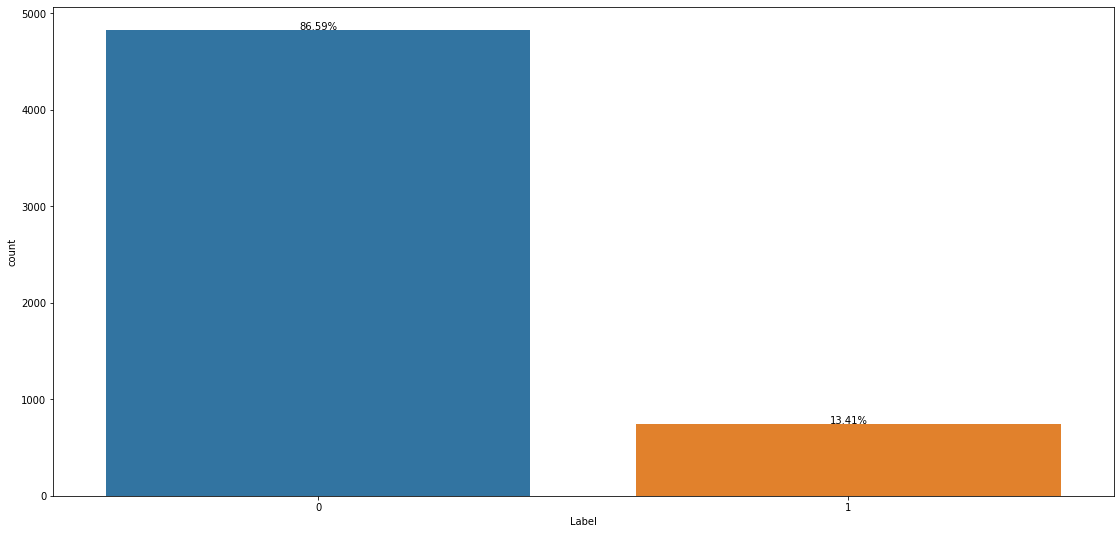

In [ ]:
plt.figure(figsize=(19,9))

ax = sns.countplot(spam['Label'])

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2,
          height,
          "{:0.2f}%".format(height/len(spam)*100),
          ha='center')

plt.show()

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def CleaningData(val):
  rex = re.sub(r'[^a-zA-Z0-9]+',' ',val)

  pos = pos_tag(word_tokenize(rex))

  filter = [WordNetLemmatizer().lemmatize(x[0],get_wordnet_pos(x[1])) for x in pos if x[0] not in stopwords.words('english')]

  filter = ' '.join(filter)

  return filter

In [ ]:
spam['ppData'] = spam['Text'].apply(CleaningData)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
spam.head(10)

spam.to_csv('/content/drive/My Drive/ColabDataset/HamOrSpam/HamSpamFinalData.csv')

In [ ]:
tf = TfidfVectorizer(max_features=500,ngram_range=(1,4),lowercase=True)
vals = tf.fit_transform(spam['ppData'])

In [ ]:
vals.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tf.get_feature_names()

['000',
 '10',
 '100',
 '1000',
 '1000 cash',
 '10p',
 '150p',
 '150ppm',
 '16',
 '18',
 '1st',
 '2000',
 '2nd',
 '50',
 '500',
 '5000',
 '800',
 'able',
 'abt',
 'account',
 'actually',
 'address',
 'afternoon',
 'ah',
 'aight',
 'all',
 'already',
 'alright',
 'also',
 'always',
 'am',
 'amp',
 'and',
 'another',
 'answer',
 'anything',
 'anyway',
 'apply',
 'ard',
 'are',
 'around',
 'as',
 'ask',
 'at',
 'attempt',
 'await',
 'award',
 'away',
 'babe',
 'baby',
 'back',
 'bad',
 'bed',
 'best',
 'big',
 'birthday',
 'bit',
 'book',
 'box',
 'boy',
 'break',
 'bring',
 'bt',
 'bus',
 'but',
 'buy',
 'call',
 'call later',
 'camera',
 'can',
 'cant',
 'car',
 'care',
 'cash',
 'chance',
 'change',
 'charge',
 'chat',
 'check',
 'claim',
 'class',
 'close',
 'co',
 'co uk',
 'code',
 'collect',
 'collection',
 'colour',
 'com',
 'come',
 'come home',
 'contact',
 'cool',
 'cos',
 'cost',
 'could',
 'coz',
 'credit',
 'cs',
 'customer',
 'customer service',
 'da',
 'dad',
 'dat',
 'dat

In [ ]:
_,xTest, _,yTest = train_test_split(vals.toarray(),spam['Label'],test_size=0.2,random_state=1)

xTrain = vals.toarray()
yTrain = spam['Label']

In [ ]:
yTrain.value_counts()

0    4825
1     747
Name: Label, dtype: int64

In [ ]:
xTrain,yTrain = SMOTE(k_neighbors=4).fit_resample(xTrain,yTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(yTrain)

9650

In [ ]:
models = {
    
    'RF':{
    "Model":RandomForestClassifier(),
    "Params":{
        'n_estimators':np.linspace(50,500,50,dtype='int64'),
        'min_samples_leaf':[2,3,4,5,6,7,8,9],
        'max_depth':[2,3,4,5,6,7,8,9],
        'criterion':['gini','entropy'],
        'min_samples_split':[2,3,4,5,6,7,8]
    }},

    'svc':{
          "Model":SVC(),
          "Params":{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma':np.arange(1e-4,1e-2,0.0001),
              'C':np.linspace(1,100,10),
              'degree':np.linspace(1,10,10)
              }},
          

          
          'log':{
              'Model':LogisticRegression(),
              'Params':{
                  'C':np.arange(0.1,1.0,0.1),
              }
          },

          

          'DT':{
              'Model':DecisionTreeClassifier(),
              'Params':{
                  'min_samples_leaf':[2,3,4,5,6,7,8,9],
                  'max_depth':[2,3,4,5,6,7,8,9],
                  'criterion':['gini','entropy'],
                  'min_samples_split':[2,3,4,5,6,7,8]
              }
          }
        }



In [ ]:
res = {}
for key,values in models.items():

  grid = RandomizedSearchCV(estimator=values['Model'],param_distributions=values['Params'],cv=5,return_train_score=False)
  grid = grid.fit(xTrain,yTrain)
  res[key] = {'Best Params':grid.best_params_,'Best Score':grid.best_score_,'Mean Score':grid.cv_results_["mean_test_score"].mean()}

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
res

{'DT': {'Best Params': {'criterion': 'entropy',
   'max_depth': 7,
   'min_samples_leaf': 3,
   'min_samples_split': 3},
  'Best Score': 0.9221761658031088,
  'Mean Score': 0.8599481865284975},
 'RF': {'Best Params': {'criterion': 'entropy',
   'max_depth': 9,
   'min_samples_leaf': 9,
   'min_samples_split': 3,
   'n_estimators': 435},
  'Best Score': 0.9484974093264247,
  'Mean Score': 0.9359170984455958},
 'log': {'Best Params': {'C': 0.9},
  'Best Score': 0.946839378238342,
  'Mean Score': 0.9383995394358089},
 'svc': {'Best Params': {'C': 45.0,
   'degree': 3.0,
   'gamma': 0.007300000000000001,
   'kernel': 'rbf'},
  'Best Score': 0.9678756476683938,
  'Mean Score': 0.884663212435233}}

{'DT': {'Best Params': {'criterion': 'entropy',
   'max_depth': 7,
   'min_samples_leaf': 3,
   'min_samples_split': 3},
  'Best Score': 0.9221761658031088,
  'Mean Score': 0.8599481865284975},
 'RF': {'Best Params': {'criterion': 'entropy',
   'max_depth': 9,
   'min_samples_leaf': 9,
   'min_samples_split': 3,
   'n_estimators': 435},
  'Best Score': 0.9484974093264247,
  'Mean Score': 0.9359170984455958},
 'log': {'Best Params': {'C': 0.9},
  'Best Score': 0.946839378238342,
  'Mean Score': 0.9383995394358089},
 'svc': {'Best Params': {'C': 45.0,
   'degree': 3.0,
   'gamma': 0.007300000000000001,
   'kernel': 'rbf'},
  'Best Score': 0.9678756476683938,
  'Mean Score': 0.884663212435233}}

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/Sentiment Analysis/BestParams.txt','w')as file:
  for key,values in res.items():
    file.write('%s:%s\n'%(key,values))

In [ ]:
vs = {}
with open('/content/drive/My Drive/Colab Notebooks/Sentiment Analysis/BestParams.txt','r')as file:
    for item in file:
      if ':' in item:
          key,value = item.split(':',1)
          vs[key]=value
    print(vs)

{'RF': "{'Best Params': {'n_estimators': 435, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_depth': 9, 'criterion': 'entropy'}, 'Best Score': 0.9484974093264247, 'Mean Score': 0.9359170984455958}\n", 'svc': "{'Best Params': {'kernel': 'rbf', 'gamma': 0.007300000000000001, 'degree': 3.0, 'C': 45.0}, 'Best Score': 0.9678756476683938, 'Mean Score': 0.884663212435233}\n", 'log': "{'Best Params': {'C': 0.9}, 'Best Score': 0.946839378238342, 'Mean Score': 0.9383995394358089}\n", 'DT': "{'Best Params': {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'entropy'}, 'Best Score': 0.9221761658031088, 'Mean Score': 0.8599481865284975}\n"}


In [ ]:
def AccuracyTest(predData,yTestData):
  print("Accuracy Test ",accuracy_score(yTestData,predData))
  print()
  print("Precision Test ",precision_score(yTestData,predData))
  print()
  print("F1 Score ",f1_score(yTestData,predData))
  print()
  print("Confusion Score ")
  print(confusion_matrix(yTestData,predData))
  print()
  print("Classification Report Score ")
  print(classification_report(yTestData,predData))

In [ ]:
FinalModel = {'dt':DecisionTreeClassifier(criterion='entropy',
   max_depth =  7,
   min_samples_leaf = 3,
   min_samples_split = 3),

   'svm':  SVC(C= 45.0,
   degree= 3.0,
   gamma= 0.007300000000000001,
   kernel= 'rbf'),

   'RF': RandomForestClassifier(criterion =  'entropy',
   max_depth =  9,
   min_samples_leaf = 9,
   min_samples_split = 3,
   n_estimators = 435),

   'log': LogisticRegression(C = 0.9,penalty='l2'),

   'NB':MultinomialNB()

}

In [ ]:
for key,values in FinalModel.items():
  ada = AdaBoostClassifier(base_estimator=values,n_estimators=100 , algorithm='SAMME')
  vals = ada.fit(xTrain,yTrain)

  print()
  print(key)

  filename = '/content/drive/My Drive/Colab Notebooks/Sentiment Analysis/Adaboost'+key+'.sav'
  pickle.dump(vals, open(filename, 'wb'))
  loaded = pickle.load(open(filename,'rb'))
  AccuracyTest(loaded.predict(xTest),yTest)

  print('---'*30)


dt
Accuracy Test  0.9982062780269059

Precision Test  1.0

F1 Score  0.9927536231884058

Confusion Score 
[[976   0]
 [  2 137]]

Classification Report Score 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       976
           1       1.00      0.99      0.99       139

    accuracy                           1.00      1115
   macro avg       1.00      0.99      1.00      1115
weighted avg       1.00      1.00      1.00      1115

------------------------------------------------------------------------------------------

svm
Accuracy Test  0.9748878923766816

Precision Test  0.87248322147651

F1 Score  0.9027777777777778

Confusion Score 
[[957  19]
 [  9 130]]

Classification Report Score 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       976
           1       0.87      0.94      0.90       139

    accuracy                           0.97      1115
   macro avg       0.93      0

In [ ]:
allLoaded = list()
for key,values in FinalModel.items():
  j = '/content/drive/My Drive/Colab Notebooks/Sentiment Analysis/Adaboost'+key+'.sav'
  loaded = pickle.load(open(j,'rb'))
  allLoaded.append(loaded)
  

In [ ]:
allLoaded

[AdaBoostClassifier(algorithm='SAMME',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='entropy',
                                                          max_depth=7,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=3,
                                                          min_samples_split=3,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
            

In [ ]:
tk = spam.ppData[2]
tk

'Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry question std txt rate T C apply 08452810075over18'

In [ ]:
mj = tf.transform([tk])
mj.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.29261924, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
loaded = allLoaded[0]
loaded.predict(mj.toarray())

array([1])